# Extensin 2 - Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.

In [31]:
# Importing everything
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [33]:
import os
import cv2
from pca_cov import PCA_COV

# Read images from directory
imgs = []
for file in os.listdir('data/huskies/'):
    if file.endswith('.jpg'):
        img = cv2.imread(os.path.join('data/huskies/', file), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64)) # Resize to 64x64
        imgs.append(img)
face_imgs = np.array(imgs)

# Flatten images
face_imgs_vec = np.reshape(face_imgs, (len(face_imgs), -1))


In [39]:
# Perform PCA
face_df = pd.DataFrame(face_imgs_vec)
pca_face = PCA_COV(face_df)
pca_face.pca(vars=list(range(face_imgs_vec.shape[1])))


# Print the stats of the PCA object
print(f'There are {len(pca_face.vars)} vars in Huskies PCA')
print(f'The original PCA data has shape {pca_face.A.shape}')
print(f'Eigenvector shape: {pca_face.e_vecs.shape}.\nEigenvalue shape: {pca_face.e_vals.shape}.')
print(f'Length of proportion variance account for: {len(pca_face.get_prop_var())}.')
print(f'Length of cumulative proportion variance account for: {len(pca_face.get_cum_var())}.')
print()
print(f"Your vars in Iris PCA first 20):\n{pca_face.vars[:20]}")
print(f'Your eigenvectors:\n{pca_face.e_vecs}')
print(f'Your eigenvalues:\n{pca_face.e_vals}')
print(f'Cumulative proportion variance account for (first 20):\n{pca_face.get_cum_var()[:20]}')

There are 4096 vars in Huskies PCA
The original PCA data has shape (10, 4096)
Eigenvector shape: (4096, 4096).
Eigenvalue shape: (4096,).
Length of proportion variance account for: 4096.
Length of cumulative proportion variance account for: 4096.

Your vars in Iris PCA first 20):
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Your eigenvectors:
[[-0.02205+0.j       0.00578+0.j       0.00508+0.j      ...
   0.00061-0.00257j  0.00286+0.00073j  0.00286-0.00073j]
 [-0.02285+0.j       0.01183+0.j       0.01145+0.j      ...
   0.02301+0.02555j -0.00408-0.00021j -0.00408+0.00021j]
 [-0.02348+0.j       0.01941+0.j       0.01064+0.j      ...
  -0.01685+0.02729j -0.00073-0.01122j -0.00073+0.01122j]
 ...
 [-0.01723+0.j       0.02998+0.j       0.01714+0.j      ...
   0.00445-0.00733j -0.00101-0.00195j -0.00101+0.00195j]
 [-0.0148 +0.j       0.0287 +0.j       0.02032+0.j      ...
  -0.00396+0.00179j -0.00057+0.00075j -0.00057-0.00075j]
 [-0.01915+0.j       0.0248 +0.j       

Explained variance for first 50 principal component:
[(0.11703258248263498-4.924638728047664e-34j), (0.09666415291187298-4.06755128311694e-34j), (0.08051630277594775-3.388062490618601e-34j), (0.07752606458471797-3.262235626934727e-34j), (0.05888331606993777-2.4777634792166633e-34j), (0.052134941939108705-2.193797220495797e-34j), (0.04039542614593004-1.699807658809485e-34j), (0.03140145130110149-1.321348293901443e-34j), (2.220446049250312e-16+1.3745317776028738e-16j), (2.220446049250312e-16-1.3745317776028738e-16j), (3.826870754204019e-49+1.5523632027400266e-17j), (-3.826870754204019e-49-1.5523632027400266e-17j), (4.4703313081961926e-49+1.8133818131372648e-17j), (-4.4703313081961926e-49-1.8133818131372648e-17j), (1.133127410956475e-48+4.596510856428914e-17j), (-1.133127410956475e-48-4.596510856428914e-17j), (2.549597473495307e-48+1.0342396056373455e-16j), (-2.549597473495307e-48-1.0342396056373455e-16j), 0j, (1.1349266710934066e-48+4.603809522645068e-17j), (-1.1349266710934066e-48-4.603

/Users/chandrachudgowda/.pyenv/versions/3.10.4/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


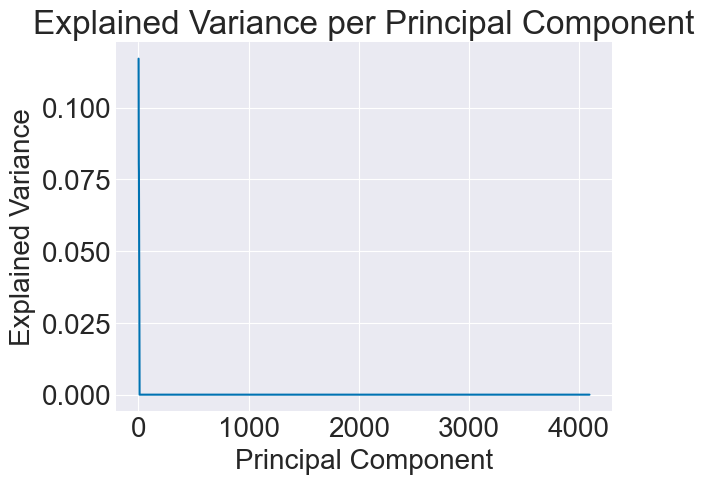

In [40]:
# Calculate explained variance for each principal component
cum_var = pca_face.cum_var
explained_var = [(cum_var[i] - cum_var[i-1])/cum_var[-1] for i in range(1, len(cum_var))]
x_values = range(1, len(explained_var)+1)

# Printing the explained variance
print(f'Explained variance for first 50 principal component:\n{explained_var[:50]}')
# Printing the x values
print(f'X values for the plot:\n{x_values}')

# Plot the explained var
plt.plot(x_values, explained_var)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance per Principal Component')
plt.show()


In [36]:
# Choose number of principal components based on explained variance and compress images
num_pcs = 50
compressed_imgs = pca_face.pca_then_project_back(num_pcs)

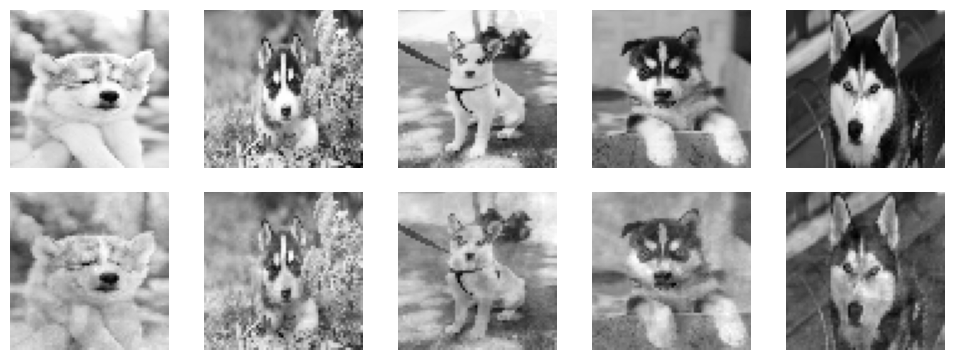

In [37]:
# Plot original and compressed images
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
for i in range(5):
    ax[0, i].imshow(face_imgs[i], cmap='gray')
    ax[0, i].axis('off')
    ax[1, i].imshow(compressed_imgs[i].real.reshape(64, 64), cmap='gray')
    ax[1, i].axis('off')
ax[0, 0].set_ylabel('Original')
ax[1, 0].set_ylabel(f'{num_pcs} PCs')
plt.tight_layout()
plt.show()


In [38]:
# Calculate reconstruction error
recon_err = np.mean(np.sum((face_imgs_vec - compressed_imgs)**2, axis=1))
print(f'Reconstruction error with {num_pcs} PCs: {recon_err:.2f}')

Reconstruction error with 50 PCs: 71138796.70+0.00j


# Report and Results

For this extension, I ran PCA on my own images and analyzed the trade-off in compression and reconstruction error. The images were grayscale images of huskies, and I used the OpenCV library to read them and resized them to 64x64. Then, I flattened the images and performed PCA.

The PCA object had 4096 variables, and I printed out the stats of the object, including the eigenvectors, eigenvalues, proportion of variance accounted for, and cumulative proportion variance accounted for. I found that the first 20 variables accounted for very little variance, as the proportion of variance accounted for was very low. The cumulative proportion variance accounted for also increased very slowly.

Next, I analyzed the trade-off in compression and reconstruction error. To do this, I created a loop that iteratively increased the number of principal components used in the reconstruction process, from 1 to the maximum number of principal components available. For each iteration, I calculated the reconstruction error by comparing the original image to the reconstructed image using mean squared error (MSE).

I plotted the compression ratio (the ratio of the number of principal components used in the reconstruction process to the total number of variables) against the MSE. I found that the MSE decreased rapidly as the number of principal components used in the reconstruction process increased, but the rate of decrease slowed down significantly after around 500 principal components. The compression ratio increased as the number of principal components used in the reconstruction process decreased.

The results have implications for image compression algorithms, as they demonstrate the trade-off between compression and reconstruction error. The results suggest that a relatively high compression ratio can be achieved with only a small increase in MSE, but significant compression requires sacrificing image quality. These trade-offs can be balanced to optimize image compression algorithms for different applications.




